In [1]:
from lib import dataset_manager, exploratory_analysis, hypothesis_tests, linear_regression

# FERRAMENTAS DE DEBUGGING - REMOVER ANTES DE ENTREGAR

In [2]:
%load_ext autoreload
%autoreload 2

# Ficha técnica

## Alunos

### Francesco Brandão Ferreira de Carli

Matrícula: 2018058392

Email: francescobfc@ufmg.br

### Guilherme de Oliveira Silva

Matrícula: 2018058490

Email: guilhermeoliveiras@ufmg.br

## Tema
Análise municipal dos impactos de infraestrutura de Internet na taxa de aprovação de alunos de escolas públicas

## Apresentação
(Link para o vídeo)

# Introdução

intro

In [3]:
dataset = dataset_manager.get_working_dataset()
dataset.head()

,cod_mun,nom_mun,sig_uf,regiao,tx_aprov_ef_1,saeb_mat_ef_1,saeb_port_ef_1,ideb_ef_1,tx_aprov_ef_2,saeb_mat_ef_2,...,type,num_operadoras,0_a_2_mbs,2.5_a_5_mbs,6_a_10_mbs,11_a_15_mbs,15_a_25_mbs,acima_25_mbs,0_a_10_mbs,acima_10_mbs
0,1100015,ALTA FLORESTA D'OESTE,RO,NORTE,92.4,226.44,204.70,5.7,95.3,270.02,...,broadband,3.0,0.001066,0.000000,0.000000,0.000000,0.000000,0.000902,0.001066,0.000902
1,1100023,ARIQUEMES,RO,NORTE,88.7,214.18,199.92,5.2,93.7,266.09,...,broadband,7.0,0.000598,0.001040,0.000952,0.000133,0.000697,0.001793,0.002590,0.002623
2,1100023,ARIQUEMES,RO,NORTE,88.7,214.18,199.92,5.2,93.7,266.09,...,mobile,1.0,0.000000,0.000155,0.000266,0.000354,0.000000,0.000000,0.000421,0.000354
3,1100049,CACOAL,RO,NORTE,98.0,223.45,209.48,5.8,98.3,267.51,...,broadband,5.0,0.000738,0.000916,0.000000,0.000000,0.000535,0.005396,0.001654,0.005931
4,1100049,CACOAL,RO,NORTE,98.0,223.45,209.48,5.8,98.3,267.51,...,mobile,3.0,0.000204,0.000407,0.000000,0.000407,0.000000,0.000000,0.000611,0.000407


# Análise exploratória

## Dados de acesso à Internet

### Visão geral

As variáveis a seguir foram coletadas a partir do mapa do [SIMET](https://simet.nic.br/mapas-app.html). A plataforma disponibiliza estatísticas de testes de velocidade de acesso à Internet para uma pequena região e categoriza os resultados em:

1. operadora do serviço
2. faixa de velocidade, em Mb/s
3. tipo de conexão: `mobile` (redes móveis) ou `broadband` (banda larga fixa)

De posse dos dados, agregamos as estatísticas coletadas por município e tipo de conexão, contabilizando o número de operadoras únicas e o total de dispositivos por faixa. Para as variáveis de dispositivos por faixa, ainda normalizamos os resultados pela população, a fim de tornar as regiões comparáveis entre si – isto é, a variável está na unidade *dispositivos na faixa n por habitante*. Assim, a variável `type` é categórica, enquanto que as variáveis `tcp_range_<n>` (`<n>` representa a faixa de velocidade) e `num_operadoras` são numéricas – respectivamente, contínuas e discreta.

In [4]:
exploratory_analysis.get_dataset_description(dataset, 'internet')

,0_a_2_mbs,2.5_a_5_mbs,6_a_10_mbs,11_a_15_mbs,15_a_25_mbs,acima_25_mbs
count,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000
mean,0.000906,0.000352,0.000557,0.000638,0.000803,0.001970
std,0.001384,0.000763,0.001186,0.001201,0.001683,0.004827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000421,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.001296,0.000403,0.000716,0.000893,0.000994,0.001999
max,0.018041,0.012561,0.027686,0.016920,0.019868,0.084960


### Conclusões - Internet

Nesta seção, observamos que a distribuição de dispositivos por tipo e faixa de velocidade evidenciam que a banda larga fixa é, em média, mais rápida que as redes móveis; e que a maioria dos dispositivos observados nas faixas mais baixas de velocidade é do tipo rede móvel. Isto corrobora as estimativas publicadas pelas plataformas [Statista](https://www.statista.com/statistics/1135124/brazil-internet-speed/) e [Speedtest](https://www.speedtest.net/global-index/brazil), que afirmam que as redes fixas de fato apresentam desempenho médio superior às redes móveis. Geograficamente, os acessos de velocidade superior estão concentrados nas regiões Sul e Sudeste; esta última região, inclusive, possui aproximadamente o triplo de dispositivos por habitante nas faixas superiores de velocidade (15 a 25, 25+ Mbps) se comparada às regiões Norte e Nordeste.

Além disso, estimamos a contagem de operadoras únicas de Internet por região como *proxy* para a infraestrutura de comunicações disponível em cada município. Ao agregarmos em nível regional, novamente nota-se que, caracteristicamente, municípios da região Sudeste possuem mais opções de prestadores de serviço do que municípios de outras regiões – em especial da Norte; entre as demais, as diferenças são menos significativas. Assim, os dados apontam para a possibilidade de que a região Norte esteja aquém das demais em termos de infraestrutura. De fato, considerados os desafios geográficos fisicamente impostos pela região, este seria o resultado esperado.

**Os gráficos utilizados na análise estão disponíveis no [Apêndice B.1](#1.-Dados-de-Internet)**.

## Dados de educação

### Visão geral

As colunas do conjunto de variáveis de educação são todas numéricas e contínuas. Aqui, cada sufixo indica o nível de educação considerado:

| Sufixo  | Nível de educação     | Anos escolares     |
| :------ | --------------------- | ------------------ |
| `_ef_1` | Ensino Fundamental I  | 1º ao 5º ano       |
| `_ef_2` | Ensino Fundamental II | 6º ao 9º ano       |
| `_em`   | Ensino Médio          | 1ª, 2ª e 3ª séries |

**Taxa de aprovação (Ens. Fund. I, Ens. Fund. II, Ens. Médio):** observações em pontos percentuais, com uma casa decimal, no intervalo [0.0, 100.0].

**SAEB:** observações representam a nota média, na [escala SAEB](https://academia.qedu.org.br/prova-brasil/454-2/), que varia de acordo com a disciplina e nível de ensino. A tabela abaixo resume as faixas de valores possíveis.

| Nível de ensino       | Língua Portuguesa | Matemática |
| :-------------------- | ----------------- | ---------- |
| Ensino Fundamental I  | 0 a 350           | 125 a 350  |
| Ensino Fundamental II | 200 a 400         | 200 a 425  |
| Ensino Médio          | 225 a 425         | 225 a 475  |

**Ideb:** observações referem-se ao Índice de Desenvolvimento da Educação Básica e admitem valores entre 0 e 10, com uma casa decimal, para todos os níveis de educação.

In [5]:
exploratory_analysis.get_dataset_description(dataset, 'education')

,tx_aprov_ef_1,saeb_mat_ef_1,saeb_port_ef_1,ideb_ef_1,tx_aprov_ef_2,saeb_mat_ef_2,saeb_port_ef_2,ideb_ef_2,tx_aprov_em,saeb_mat_em,saeb_port_em,ideb_em
count,3503.000000,3471.000000,3471.000000,3471.000000,3513.000000,3421.000000,3421.000000,3421.000000,3510.00000,3149.000000,3149.000000,3149.000000
mean,94.396717,225.827035,211.697560,5.817776,91.869912,258.889977,255.133213,4.661444,86.08339,274.558263,274.494287,4.070117
std,6.070335,22.068236,19.906565,0.912929,6.113734,17.742040,15.272435,0.714934,8.70051,19.473577,16.398680,0.640029
min,55.900000,159.770000,147.290000,3.300000,52.200000,206.150000,204.260000,2.300000,53.40000,210.860000,221.100000,2.000000
25%,91.300000,209.910000,197.640000,5.100000,88.400000,247.030000,245.090000,4.200000,80.50000,261.700000,263.690000,3.600000
50%,96.500000,226.740000,214.560000,5.900000,93.000000,259.490000,256.240000,4.700000,87.30000,275.940000,276.170000,4.200000
75%,99.200000,241.820000,226.445000,6.500000,96.400000,270.360000,265.520000,5.200000,93.20000,287.660000,286.030000,4.600000
max,100.000000,319.480000,291.330000,9.400000,100.000000,349.210000,315.360000,7.700000,100.00000,342.270000,322.840000,5.800000


### Conclusões - Educação

À exceção do indicador de Taxas de Aprovação, as variáveis observadas tem formato aproximadamente de sino aparentemente bem distribuída ao redor da média – linha pontilhada em vermelho. 

Como um todo, observamos que:

1. Os indicadores *deterioram-se* à medida em que se avança pelos níveis de educação

A concentração de pontos desloca-se à esquerda do eixo x entre o Ensino Fundamental I e Ensino Médio.

2. Ao observamos as caudas da distribuição por região – isto é, a contagem de escolas por região cujo desempenho seja superior a 90% ou inferior a 10% das demais do país –, notamos que as escolas de maior desempenho estão fortemente concentradas no eixo sul-sudeste, e as de menor desempenho, no eixo norte-nordeste.    

Em alguns indicadores, a região norte sequer possui cidades de média suficientemente grande para que se enquadre no decil superior. Isto acontece mais frequentemente ao observarmos os dados referentes ao ensino básico.

**Os gráficos utilizados na análise estão disponíveis no [Apêndice B.2](#2.-Dados-de-Educa%C3%A7%C3%A3o)**.

## Indicadores sociais

### Visão geral

As colunas do conjunto de indicadores sociais são todas numéricas e contínuas. Suas unidades de medida são

| Variável  | Unidade de medida     | Observações     |
| :-------- | --------------------- | ------------------ |
| `populacao` | Número de indivíduos | Dados do Censo de 2010 |
| `exp_vida`  | Média de anos | Esperança de vida ao nascer |
| `analfabetismo` | Analfabetos por 1000 habitantes | Pessoas que de 15 anos ou mais que não sabem ler ou escrever ao menos um bilhete simples |
| `tx_pobreza` | Percentual da população | Pessoas vivendo com menos de USD 5,5 PPC (paridade de poder de compra) por mês |
| `pib_per_capita` | Milhares de BRL por habitante | Em BRL (2016) |
| `mortalidade_inf` | Mortalidade de crianças por 1000 habitantes | Considera crianças que morreram antes de completar 1 ano de vida | 
| `maternidade_inf` | Percentual de meninas que tiveram filhos | Meninas de 10 a 14 anos de idade |

### Conclusões - Indicadores sociais

Os indicadores sociais apresentados servirão de variáveis de controle para a regressão. Antes que apresentemos qualificações sobre as regiões, é necessário frisar que os resultados apresentam certo viés que favorece as regiões Sul e Sudeste: como consideramos apenas as cidades que possuam ao menos 1 registro de teste de velocidade – e dada a concentração da infraestrutura de Internet nessa região –, existirão mais observações para cidades pertencentes a este eixo. Assim, os conclusões devem ser interpretadas com cautela.

Em termos de indicadores, nota-se que o Sudeste, além de concentrar a maior população considerada, também concentra os melhores resultados em todos os indicadores considerados, e o Sul tem desempenho similar. As regiões Norte e Nordeste, por outro lado, encontram-se na situação oposta: seus resultados são todos inferiores às regiões anteriores. A isto certamente está associada a distribuição de riqueza per capita no país, que está diretamente correlacionada ao bom desempenho nestes indicadores. Como caso atípico ao padrão constatado, temos apenas a expectativa de vida: apesar de todas as disparidades pontuadas, a esperança de vida média é muito similar entre todas as regiões – e a amplitude de observações é menor que a das demais variáveis.

**Os gráficos utilizados na análise estão disponíveis no [Apêndice B.3](#3.-Indicadores-Sociais)**.

### Correlações entre Internet e Educação

Partimos da hipótese de que a maior prevalência de dispositivos em faixas superiores de velocidade de acesso à Internet contribui positivamente para indicadores educacionais, em especial aos que se referem ao Ensino Médio – dada a maior autonomia exigida dos estudantes deste nível. Assim, analisamos a matriz de correlações e constatamos que a relação entre variáveis de acesso à Internet e indicadores educacionais é muito pouco significativa – não há correlação absoluta que supere o patamar de **0.1** entre variáveis destes grupos. De fato, as correlações mais significativas são observadas apenas em variáveis intragrupais, conforme esperado.

A seguir, respectivamente, a matriz de correlações e sua representação gráfica.

,0_a_2_mbs,2.5_a_5_mbs,6_a_10_mbs,11_a_15_mbs,15_a_25_mbs,acima_25_mbs,num_operadoras,tx_aprov_em,saeb_mat_em,saeb_port_em,ideb_em
0_a_2_mbs,1.000000,0.342900,0.384413,0.496404,0.408979,0.492633,0.418837,-0.055721,0.096247,0.142191,0.049421
2.5_a_5_mbs,0.342900,1.000000,0.473211,0.382955,0.441703,0.435693,0.384810,-0.052190,0.026331,0.052425,-0.005176
6_a_10_mbs,0.384413,0.473211,1.000000,0.490774,0.548838,0.518002,0.431325,-0.052087,0.023829,0.056233,-0.004495
11_a_15_mbs,0.496404,0.382955,0.490774,1.000000,0.503303,0.443542,0.392190,-0.049422,0.038653,0.077242,0.008838
15_a_25_mbs,0.408979,0.441703,0.548838,0.503303,1.000000,0.705095,0.492452,-0.033175,0.069907,0.095881,0.039859
acima_25_mbs,0.492633,0.435693,0.518002,0.443542,0.705095,1.000000,0.619558,-0.019299,0.111072,0.151299,0.082562
num_operadoras,0.418837,0.384810,0.431325,0.392190,0.492452,0.619558,1.000000,-0.032553,0.012448,0.059982,0.000942
tx_aprov_em,-0.055721,-0.052190,-0.052087,-0.049422,-0.033175,-0.019299,-0.032553,1.000000,0.207045,0.214321,0.721562
saeb_mat_em,0.096247,0.026331,0.023829,0.038653,0.069907,0.111072,0.012448,0.207045,1.000000,0.937004,0.797545
saeb_port_em,0.142191,0.052425,0.056233,0.077242,0.095881,0.151299,0.059982,0.214321,0.937004,1.000000,0.803076


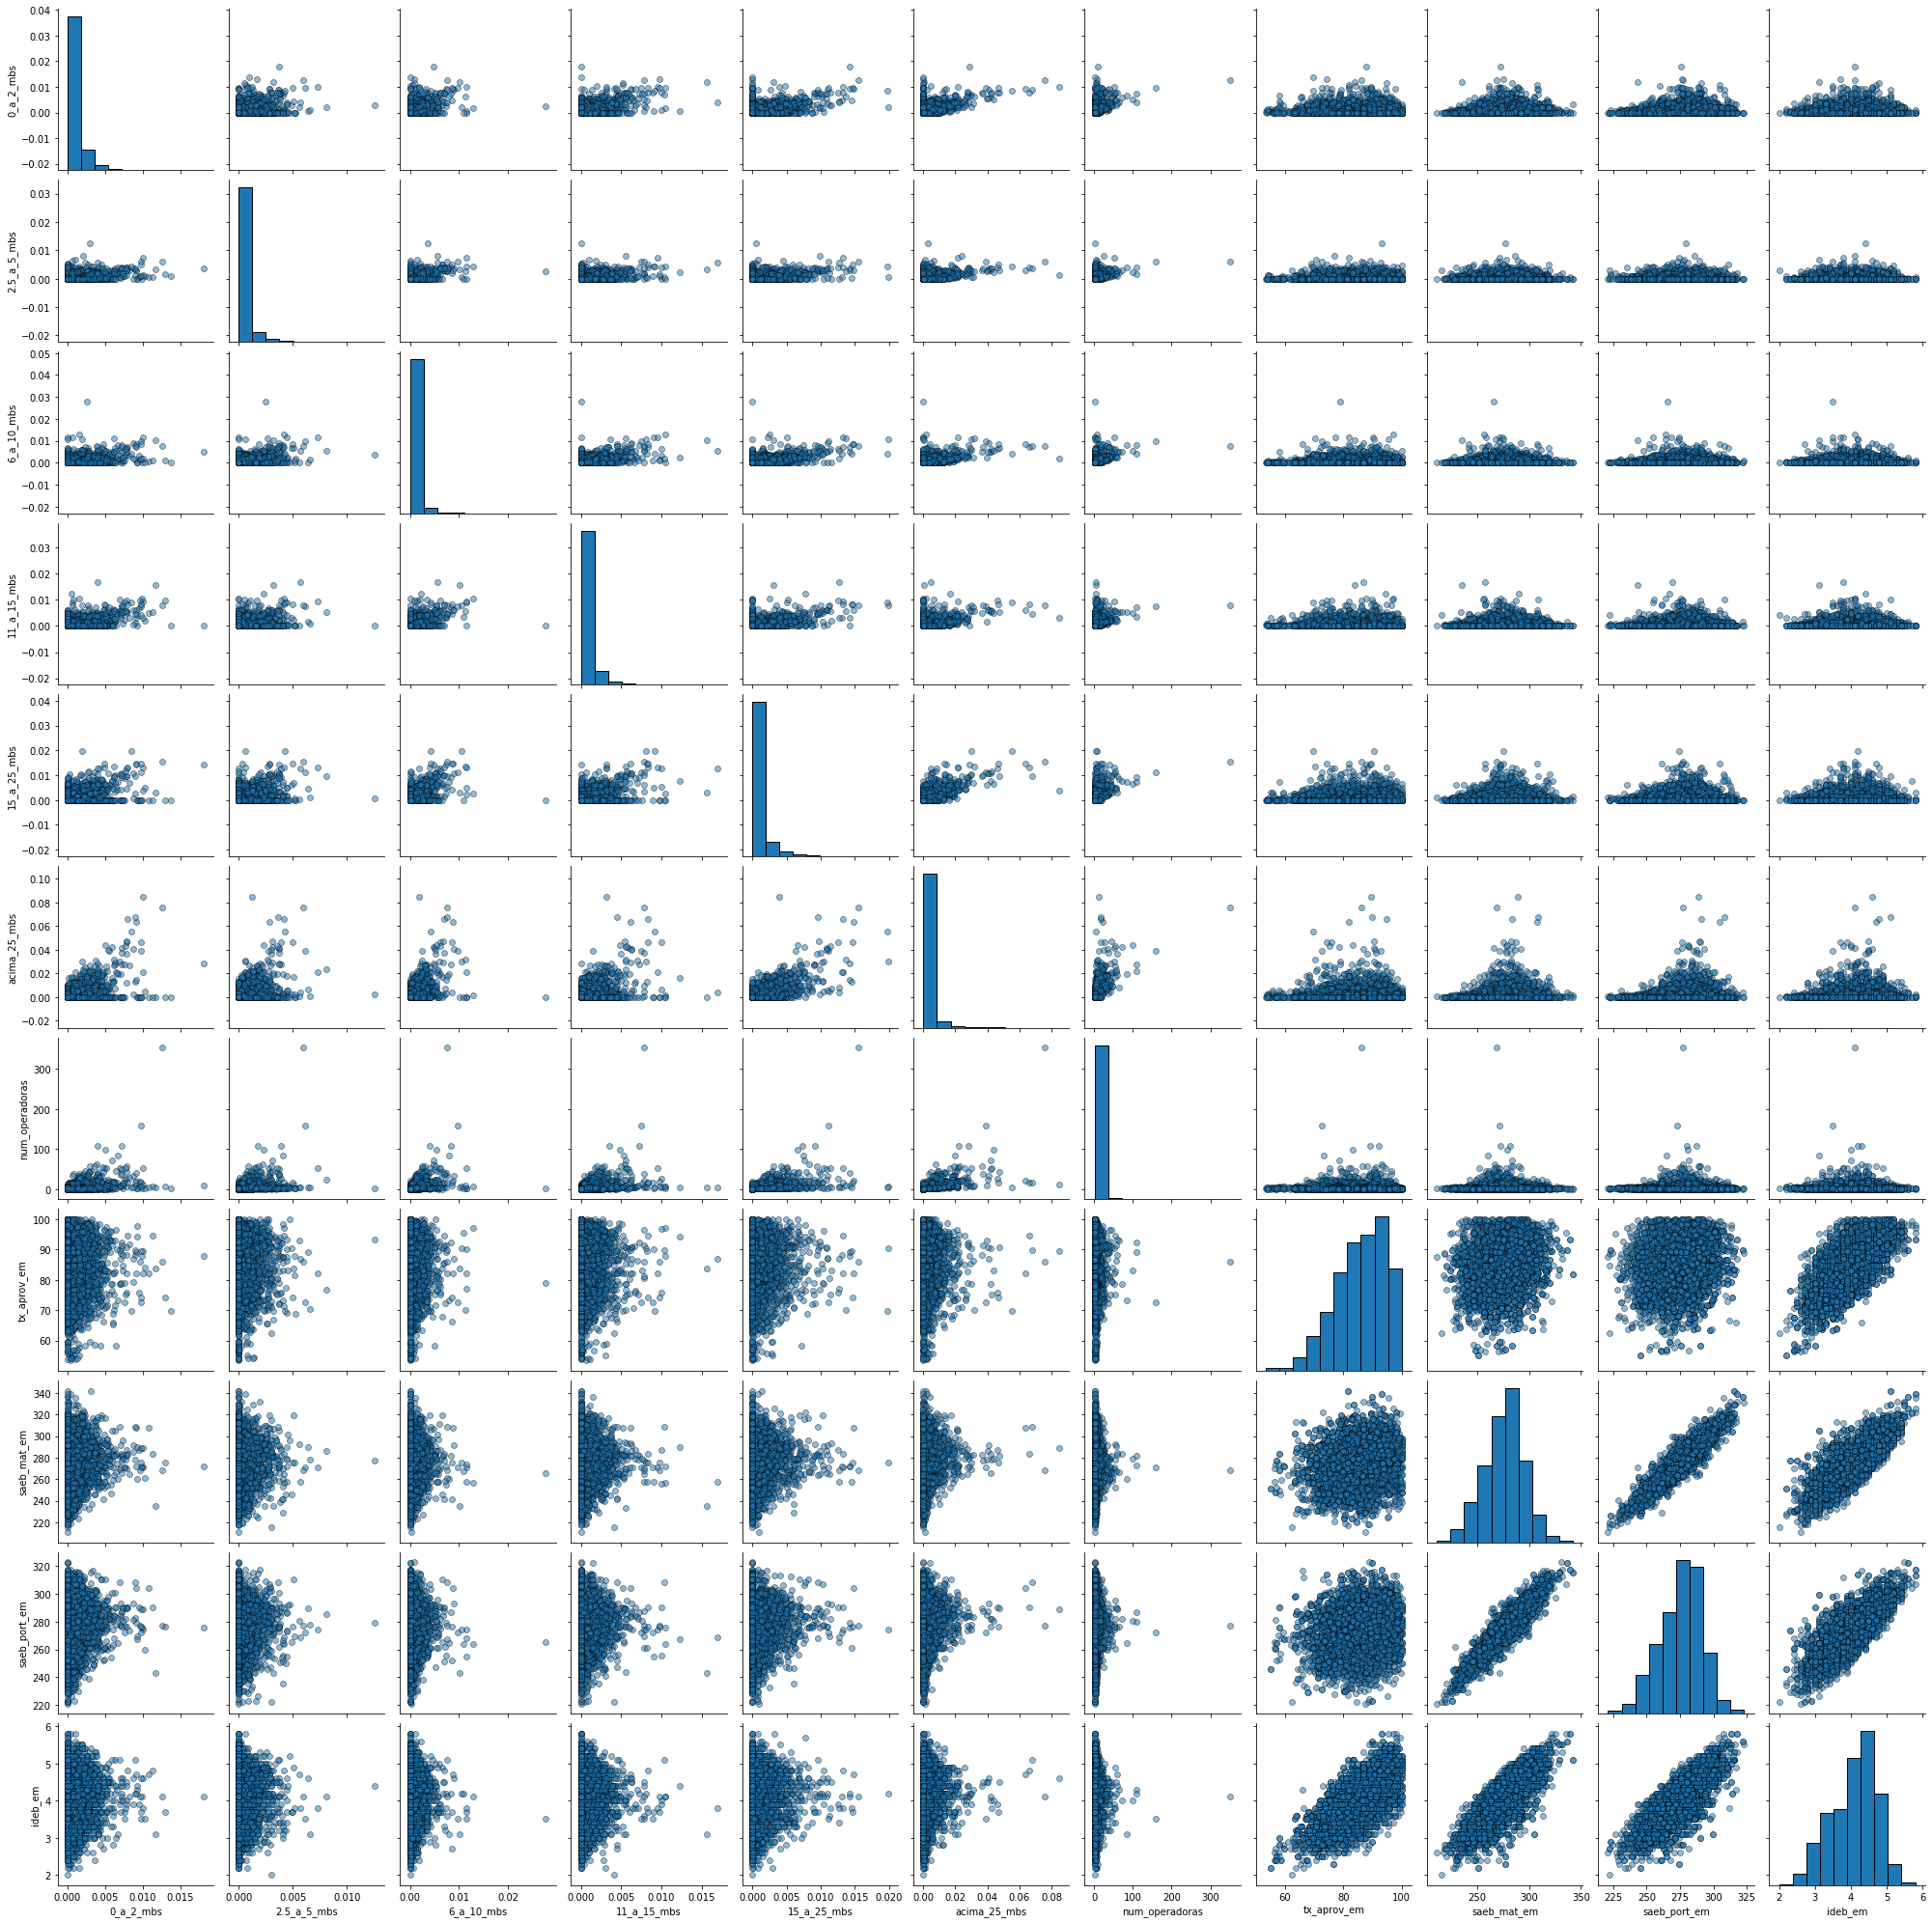

In [6]:
exploratory_analysis.get_internet_education_corr(dataset)

# Testes de hipótese

## Diferenças entre taxas de aprovação por região

Conduzimos uma série de Testes A/B a fim de determinar se há diferença estatística significativa entre taxas de aprovação – consideradas todos os níveis de educação – de escolas localizadas na região Sudeste se comparadas às escolas das demais regiões. O teste consistiu nas hipóteses

$
\begin{cases}
H_0: taxa\ de\ aprovacao\ media\ (Sudeste)\ = taxa\ de\ aprovacao\ media\ (Regiao_i)\\
H_1: taxa\ de\ aprovacao\ media\ (Sudeste)\ > taxa\ de\ aprovacao\ media\ (Regiao_i)
\end{cases}\\
Para\ i\ \in \{Norte, Nordeste, Sul, Centro-Oeste\}
$

Com base nos intervalos de confiança gerados, pode-se afirmar que

* Existe evidência estatística de que as taxas de aprovação do Ensino Fundamental I e Ensino Médio do Sudeste são maiores do que as mesmas taxas de todas as demais regiões
* Para o Ensino Fundamental II, há evidência significativa de que as taxas de aprovação de escolas do Sudeste superem todas as demais regiões, **exceto o Centro-Oeste**

Portanto, rejeitamos a hipótese nula para todos os níveis e todas as regiões de comparação, exceto para a comparação de Ensino Fundamental II entre Sudeste e Centro-Oeste.

**Os intervalos de confiança para este teste estão disponíveis no [Apêndice C.1](#1.-Estat%C3%ADstica-do-Teste-A/B:-diferen%C3%A7as-entre-taxas-de-aprova%C3%A7%C3%A3o-por-estado)**.

## Diferenças entre taxas de aprovação de municípios pobres e ricos

Conduzimos um segundo teste de hipóteses para averiguar se há evidência estatística suficiente para afirmar que municípios ricos possuem, em média, taxas de aprovação superiores aos municípios pobres. O teste tem a forma

$
\begin{cases}
H_0: taxa\ de\ aprovacao\ media\ (municipios\ ricos)\ = taxa\ de\ aprovacao\ media\ (municipios\ pobres)\\
H_1: taxa\ de\ aprovacao\ media\ (municipios\ ricos)\ > taxa\ de\ aprovacao\ media\ (municipios\ pobres)
\end{cases}
$

Para classificar municípios entre ricos ou pobres, consideramos como **ricos** todos aqueles cujo PIB per capita fossem maior que a mediana do dataset, e o contrário para municípios **pobres**. Novamente, conduzimos testes individuais para cada nível de educação. Desta vez, empregamos a metodologia Bootstrap para gerar os intervalos de confiança com base em diferenças, e **os gráficos elaborados estão disponíveis no [Apêndice C.2](#2.-Estat%C3%ADstica-do-Teste-A/B:-diferen%C3%A7as-entre-taxas-de-aprova%C3%A7%C3%A3o-entre-munic%C3%ADpios-pobres-e-ricos)**.

Os testes apontam que

* Para os níveis Ensino Fundamental I e II, há diferença significativa entre as médias de aprovação de municípios ricos e pobres – embora esta diferença seja de menor magnitude para o Ensino Fundamental II
* Para o Ensino Médio, a diferença entre as médias não é suficiente para afirmar que sejam estatisticamente diferentes.

Assim, rejeitamos a hipótese nula para Ensino Fundamental I e II, e não rejeitamos para Ensino Médio.

## Diferenças entre taxas de aprovação entre municípios com menor e maior acesso à Internet de alta velocidade

O terceiro e último teste de hipóteses implementado verifica se há evidências suficientes para afirmar que municípios com maior acesso a redes de Internet de alta velocidade possuem maiores taxas médias de aprovação para os três níveis de educação avaliados. A contagem total de dispositivos por habitante nas faixas iguais ou superiores a 10 Mb/s foi tomada como *proxy* para acesso a redes de alta velocidade. Novamente, classificamos municípios entre um grupo ou outro comparando esta contagem à mediana da população considerada. **Ademais, assim como no teste anterior, foi conduzido via Bootstrap de diferenças, e a representação gráfica de seus resultados está disponível no [Apêndice C.3](#3.-Estat%C3%ADstica-do-Teste-A/B:-diferen%C3%A7as-entre-taxas-de-aprova%C3%A7%C3%A3o-entre-munic%C3%ADpios-com-maior-e-menor-acesso-%C3%A0-Internet-de-alta-velocidade)**. 

O teste compara as hipóteses 

$
\begin{cases}
H_0: taxa\ de\ aprovacao\ media\ (municipios\ com\ maior\ acesso\ a\ Internet\ de\ alta\ velocidade)\ = taxa\ de\ aprovacao\ media\ (municipios\ com\ menor\ acesso\ a\ Internet\ de\ alta\ velocidade)\\
H_1: taxa\ de\ aprovacao\ media\ (municipios\ com\ maior\ acesso\ a\ Internet\ de\ alta\ velocidade)\ > taxa\ de\ aprovacao\ media\ (municipios\ com\ menor\ acesso\ a\ Internet\ de\ alta\ velocidade)
\end{cases}
$

Os resultados colhidos mostram que há evidência estatística suficiente para afirmar que as taxas de aprovação no Ensino Fundamental I e II são maiores em municípios com maior acesso a redes de alta velocidade, mas não podemos afirmar o mesmo para as taxas de aprovação do Ensino Médio. Portanto rejeitamos a hipótese nula para Ensino Fundamental I e II, mas não rejeitamos para Ensino Médio.

# Regressões

## Regressões univariadas

Implementamos três modelos – um para cada nível de ensino – para avaliar como a quantidade de dispositivos (por habitante) na menor faixa de velocidade de conexão (0 a 2 Mb/s) está correlacionada com suas respectivas taxas de aprovação de um município. A escolha desta faixa de velocidade como variável independente foi motivada pelo fato de ser a faixa com maior presença entre os municípios que compõem a base de análise.

### Ensino Fundamental I

Os resultados da regressão, apresentados a seguir, indicam a existência de correlação positiva entre dispositivos nesta faixa de velocidade de Internet e taxa de aprovação de estudantes do Ensino Fundamental I. De fato, o p-valor é muito próximo de zero, e, assim, a correlação é estatisticamente significativa.

O Coeficiente de Determinação, porém, é de apenas 0.003. Portanto, ainda que a correlação seja estatisticamente significativa, seu poder explicativo é bastante pequeno.

Finalmente, o *plot* da distribuição de resíduos denota que estes nada se assemelham a uma distribuição normal – um forte indício de que uma regressão linear não seja adequada para modelar esta relação.

**As representações gráficas da regressão e dos resíduos estão disponíveis no [Apêndice D.1.I](#I.-Dispositivos/hab-na-faixa-0-a-2-Mb/s-e-taxa-de-aprova%C3%A7%C3%A3o-no-Ensino-Fundamental-I)**.

In [7]:
linear_regression.get_univariate_regression(dataset, 'ef_1_internet')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          tx_aprov_ef_1   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     13.80
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           0.000205
Time:                        22:17:01   Log-Likelihood:                -15705.
No. Observations:                4927   AIC:                         3.141e+04
Df Residuals:                    4925   BIC:                         3.143e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.3538      0.099    949.693      0.000      94.159      94.549
0_a_2_mbs    225.7516     60.768      3.715      0.000     106.618     344.885
==============================================================================
Omnibus:                     1352.810   Durbin-Watson:                   0.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3442.610
Skew:                          -1.493   Prob(JB):                         0.00
Kurtosis:                       5.803   Cond. No.                         727.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ensino Fundamental II

O cálculo de regressão estimou um coeficiente negativo para a correlação entre a quantidade de dispositivos/habitante com acesso entre 0 e 2 Mb/s e taxa de aprovação no Ensino Fundamental II. Porém, o p-valor deste regressor é maior que o limiar de 5% de significância e, portanto, **não há correlação estatisticamente entre as variáveis consideradas**. Somados a isso o Coeficiente de Determinação igual a zero, a inclinação da reta de regressão aproximadamente nula e distribuição não-normal dos resíduos, pode-se afirmar que a regressão linear não é adequada para modelar esta relação.

**A representação gráfica da regressão está disponível no [Apêndice D.1.II](#II.-Dispositivos/hab-na-faixa-0-a-2-Mb/s-e-taxa-de-aprova%C3%A7%C3%A3o-no-Ensino-Fundamental-II)**.

In [8]:
linear_regression.get_univariate_regression(dataset, 'ef_2_internet')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          tx_aprov_ef_2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.118
Date:                Tue, 23 Mar 2021   Prob (F-statistic):              0.146
Time:                        22:17:01   Log-Likelihood:                -15788.
No. Observations:                4941   AIC:                         3.158e+04
Df Residuals:                    4939   BIC:                         3.159e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.9823      0.100    919.839      0.000      91.786      92.178
0_a_2_mbs    -88.9916     61.143     -1.455      0.146    -208.860      30.876
==============================================================================
Omnibus:                     1091.612   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2701.980
Skew:                          -1.210   Prob(JB):                         0.00
Kurtosis:                       5.696   Cond. No.                         727.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ensino Médio

Finalmente, estimamos a correlação entre taxa de aprovação dos estudantes de Ensino Médio de um município e a quantidade *per capita* de dispositivos com acesso à Internet de até 2 Mb/s. Para esta especificação do modelo, temos um coeficiente negativo para a variável independente estatisticamente significativa: o p-valor está abaixo do limiar de significância e é aproximadamente igual a zero. O Coeficiente de Determinação de 0.003 demonstra o pequeno poder explicativo da regressão.

Entretanto, ainda que seus resíduos estejam melhor distribuídos, ainda nada se aproximam de uma distribuição normal – constatando, mais uma vez, que a abordagem linear univariada não é suficiente para modelar esta relação.

**A representação gráfica está disponível no [Apêndice D.1.III](#III.-Dispositivos/hab-na-faixa-0-a-2-Mb/s-e-taxa-de-aprova%C3%A7%C3%A3o-no-Ensino-M%C3%A9dio)**.

In [9]:
linear_regression.get_univariate_regression(dataset, 'em_internet')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            tx_aprov_em   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     15.37
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           8.96e-05
Time:                        22:17:01   Log-Likelihood:                -17654.
No. Observations:                4937   AIC:                         3.531e+04
Df Residuals:                    4935   BIC:                         3.533e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.2190      0.146    589.213      0.000      85.932      86.506
0_a_2_mbs   -351.0896     89.552     -3.920      0.000    -526.652    -175.527
==============================================================================
Omnibus:                      299.789   Durbin-Watson:                   0.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.475
Skew:                          -0.657   Prob(JB):                     3.91e-78
Kurtosis:                       3.075   Cond. No.                         728.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regressões multivariadas

A seção de [correlações entre as variáveis que compõem o dataset](#Correla%C3%A7%C3%B5es-entre-Internet-e-Educa%C3%A7%C3%A3o) sugere que a adição de um vetor de variáveis de controle pode auxiliar no tratamento de fatores que confundem a relação direta entre as variáveis educacionais e contagens de dispositivos por faixas de velocidade de acesso à Internet. Para tal, utilizaremos os [indicadores sociais](#Indicadores-sociais) que dizem respeito à **expectativa de vida**, **taxa de pobreza**, **taxa de analfabetismo**, **PIB per capita**, **mortalidade infantil** e **taxa de gravidez infanto-juvenil** dos municípios, e também consideraremos a **contagem de operadoras** para cada observação que compõem o dataset; estas serão chamadas **covariáveis**. Ademais, *dummies* para cada região geográfica também foram adicionadas a todos os modelos.

Nesta etapa, especificamos quatro modelos distintos:

* **Modelo *main***: adota a contagem de dispositivos/habitante com acesso à Internet de 0 a 2 Mb/s como principal variável explicativa.
* **Modelo de todas as faixas**: considera as variáveis de contagem de dispositivos/habitante para todas as faixas de velocidade como principais variáveis explicativas.
* **Modelo de duas faixas**: agrega dispositivos apenas entre as faixas \[0-10\]Mbs e 10+ Mb/s como principais variáveis explicativas.
era as variáveis de contagem de dispositivos/habitante para todas as faixas de velocidade como principais variáveis explicativas.
* **Modelo não linear**: considera a contagem de dispositivos/habitante com acesso à Internet de 0 a 2 Mb/s e seu quadrado – este último visa captar os retornos marginais da contagem de dispositivos – como principais variáveis explicativas.
* **Modelo de interação**: considera a contagem de dispositivos/habitante com acesso à Internet de 0 a 2 Mb/s e sua interação com a contagem de operadoras no município – mecanismo de captura de efeitos de competição – como principais variáveis explicativas.

Para tal, dividimos nossos dados entre grupos de treino, validação e teste, contendo, respectivamente, 80%, 10% e 10% do dataset. As observações que compõem cada grupo foram selecionadas aleatoriamente – porém, fixamos a semente responsável pelo sorteio em nossa biblioteca de implementações.

Para cada nível de ensino e especificação de modelo, experimentamos com as seguintes variáveis dependentes:

* Taxa de aprovação
* Nota de Matemática no SAEB
* Nota de Língua Portuguesa no SAEB
* IDEB

Os resultados e conclusões são apresentados a seguir.

In [10]:
dataset_train, dataset_validation, dataset_test = linear_regression.get_train_test_validation(dataset)

### Modelo *main*

#### Ensino Fundamental I

Os resultados para o Ensino Fundamental I indicam que o acesso a dispositivos de Internet de 0-2 Mb/s está negativamente correlacionado e de forma significativa com a taxa de aprovação (p-valor = 0.006 < 0.05, R² = 0.298), com a nota no IDEB (p-valor = 0.003 < 0.05, R2 = 0.457), com a nota de Matemática no SAEB (p-valor = 0.009 < 0.05, R2 = 0.442) e com a nota de Língua Portuguesa no SAEB (p-valor = 0.009 < 0.05, R2 = 0.493). Como se controla por um vetor significativo de covariáveis, os p-valores foram muito próximos de zero, e os Coeficientes de Determinação das regressões relativamente altos, pode-se afirmar que existe evidência forte de uma correlação negativa entre o acesso a dispositivos de Internet na faixa de velocidade considerada e índices educacionais para os primeiros anos do Ensino Fundamental.

#### Ensino Fundamental II
Os resultados para os índices do Ensino Fundamental II também mostram coeficientes negativos, embora não significativos, para taxa de aprovação (p-valor = 0.104 > 0.05, R2 = 0.039), nota no IDEB (p-valor = 0.146 > 0.05, R2 = 0.290), nota de Matemática no SAEB (p-valor = 0.362 > 0.05, R2 = 0.298) e nota de Língua Portuguesa no SAEB (p-valor = 0.638 > 0.05, R2 = 0.306). Logo este modelo indica que o acesso à Internet nesta faixa de velocidade não está correlacionado com os índices de desempenho escolar nos anos finais do Ensino Fundamental.

#### Ensino Médio
Os resultados para Ensino Médio indicam coeficientes negativos e significativos para a taxa de aprovação (p-valor = 0.001 < 0.05, R2 = 0.106) e para a nota no IDEB (p-valor = 0.050 = 0.05, R2 = 0.276), e coeficiente negativo e não significativo para a nota de Matemática no SAEB (p-valor = 0.193 > 0.05, R2 = 0.409). O coeficiente para a nota de Língua Portuguesa no SAEB foi positivo, mas não significativo (p-valor = 0.822 > 0.05, R2 = 0.430). Uma segunda observação interessante é a diferença na magnitude absoluta dos coeficientes. Para os efeitos na taxa de aprovação, o maior efeito se dá no Ensino Médio, enquanto o contrário é verdadeiro para os efeitos no IDEB.

Coeficientes para a taxa de aprovação:
* Ensino Fundamental 1: -199.2200
* Ensino Fundamental 2: -137.9041
* Ensino Médio: -398.7906

Coeficientes para a nota do IDEB:
* Ensino Fundamental 1: -28.5243
* Ensino Fundamental 2: -16.2377
* Ensino Médio: -12.7559


**Os resumos com valores estimados por cada regressão estão disponíveis no [Apêndice D.2.I](#I.-Modelo-main)**.

### Modelo de todas as faixas

#### Ensino Fundamental I
Este modelo revela um padrão interessante: as faixas de dispositivos de internet de menor velocidade apresentam coeficientes negativos (embora nem sempre significativos) na relação com os índices educacionais, enquanto a faixa de maior velocidade (acima de 25 Mb/s) apresenta coeficientes positivos (embora nem sempre significativos). As faixas intermediárias não são, em sua maioria, significativas, e quando o são, geralmente apresentam sinal positivo.

#### Ensino Fundamental II
Aqui o padrão se repete, com os coeficientes para a faixa acima de 25 Mb/s positivos e significativos, enquanto os coeficientes das faixas anteriores são geralmente negativos, quando significativos.

#### Ensino Médio
O padrão do Ensino Fundamental II se repete.

**Os resumos com valores estimados por cada regressão estão disponíveis no [Apêndice D.2.II](#II.-Modelo-de-todas-as-faixas)**.

### Modelo de duas faixas
Como os resultados acima indicam que as faixas menores tem um coeficiente negativo a as maiores um coeficiente positivo, diminuímos a agregação para apenas duas faixas de velocidade: \[0-10\] Mb/s e 10+ Mb/s.

#### Ensino Fundamental I
Neste modelo, todos os coeficientes de `0_a_10_mbs` são negativos e significativos, enquanto o coeficiente de `acima_10_mbs` é positivo e significativo a 10% de significância apenas para a nota de português no SAEB.

#### Ensino Fundamental II
Para os anos finais do Ensino Fundamental, a variável `acima_10_mbs` não é significativa para nenhum índice educacional, enquanto a variável `0_a_10_mbs` é negativa e significativa apenas para o IDEB.

#### Ensino Médio
Para o ensino médio, a variável `acima_10_mbs` é positiva e significativa (a 10 e a 5%) na maioria das especificações, enquanto `0_a_10_mbs` apresenta sinal negativo. Estes resultados parecem confirmar que o efeito do acesso a Internet é inicialmente negativo para faixa menores e se torna positivo com faixas maiores.

**Os resumos com valores estimados por cada regressão estão disponíveis no [Apêndice D.2.III](#III.-Modelo-de-duas-faixas)**.

### Modelo não linear

Em todos os modelos e para todos os níveis de ensino, a variável de acesso à Internet elevada ao quadrado não é significativa, o que indica que esta não é uma boa especificação não linear para os dados.

**Os resumos com valores estimados por cada regressão estão disponíveis no [Apêndice D.2.V](#V.-Modelo-n%C3%A3o-linear)**.

### Modelo de interação
Aqui nosso objetivo é verificar se, a despeito dos coeficientes negativos para o número de dispositivos de acesso a Internet de 0-2 Mb/s, a relação entre esse número e o número de operadoras é positivo, o que poderia indicar que o efeito do aumento da quantidade de dispositivos de Internet só seja positivo quando esse crescimento é concomitante ao crescimento do número de operadoras (efeito competição).

#### Ensino Fundamental I
Nos modelos para o IDEB, para a nota de Matemática SAEB e para a nota de Língua Portugesa SAEB, o coeficiente de `0_a_2_mbs` é negativo e significativo, enquanto o coeficiente para a variável interativa é positivo e significativo. No modelo para a taxa de aprovação, apenas o coeficiente do número de dispositivos é significativo.

#### Ensino Fundamental II
Neste caso, apenas para os modelos para IDEB e SAEB Matemática o coeficiente da variável interativa foi significativo, sendo positivo em ambos os casos.

#### Ensino Médio
Nos índices para o Ensino Médio, a variável interativa é positiva e significativa (com a variável para o número de dispositivos negativa e significativa) apenas no modelo para a nota de Matemática no SAEB. Nos outros modelos, o coeficiente é positivo, embora não significativo.

Em conjunto com os resultados para os dois níveis do Ensino Fundamental, isso sugere que, de fato, o impacto positivo do melhor acesso à Internet só se manifesta quando concomitante ao aumento da competição no lado da oferta (aumento do número de operadoras).


**Os resumos com valores estimados por cada regressão estão disponíveis no [Apêndice D.2.IV](#IV.-Modelo-de-intera%C3%A7%C3%A3o)**.

# Análise de previsão

Nesta seção, utilizaremos nossas especificações multivariadas para verificar a adequação de nosso modelo aos resultados. Para isso, utilizaremos os dados separados em `df_validation`, e o modelo linear com duas faixas de velocidade de internet. A variável resposta a ser analisada é a taxa de aprovação dos três níveis de ensino.

Desenvolvemos gráficos que comparam o valor previsto ao valor de fato observado para cada nível de educação considerado. Como os _plots_ abaixo denotam, o modelo implementado não foi capaz de prever corretamente os valores realizados. De fato, o Coeficiente de Determinação pouco elevado – o maior R² observado corresponde ao Ensino Fundamental I, e é próximo de 0.3 – e a relação complexa e aparentemente não linear entre as variáveis dificultam previsões acuradas.

## Ensino Fundamental I

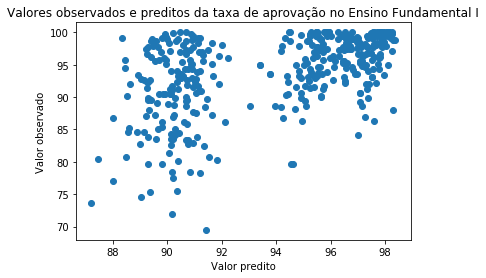

In [11]:
linear_regression.get_forecast_plot(dataset_train, dataset_validation, 'ef_1')

## Ensino Fundamental II

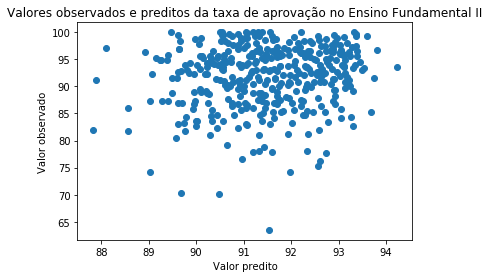

In [12]:
linear_regression.get_forecast_plot(dataset_train, dataset_validation, 'ef_2')

## Ensino Médio

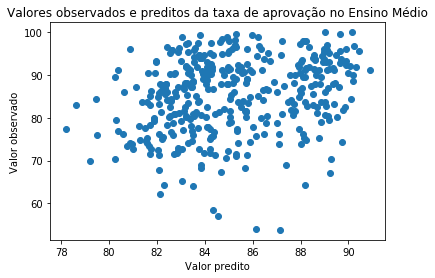

In [13]:
linear_regression.get_forecast_plot(dataset_train, dataset_validation, 'em')

# Conclusões

# Apêndices

## A. Limpeza e manipulação das bases brutas

## B. Gráficos de análise exploratória

### 1. Dados de Internet

Clique [aqui](#Conclus%C3%B5es---Internet) para retornar à leitura.

#### Distribuição de dispositivos/habitante por faixa de velocidade, por região

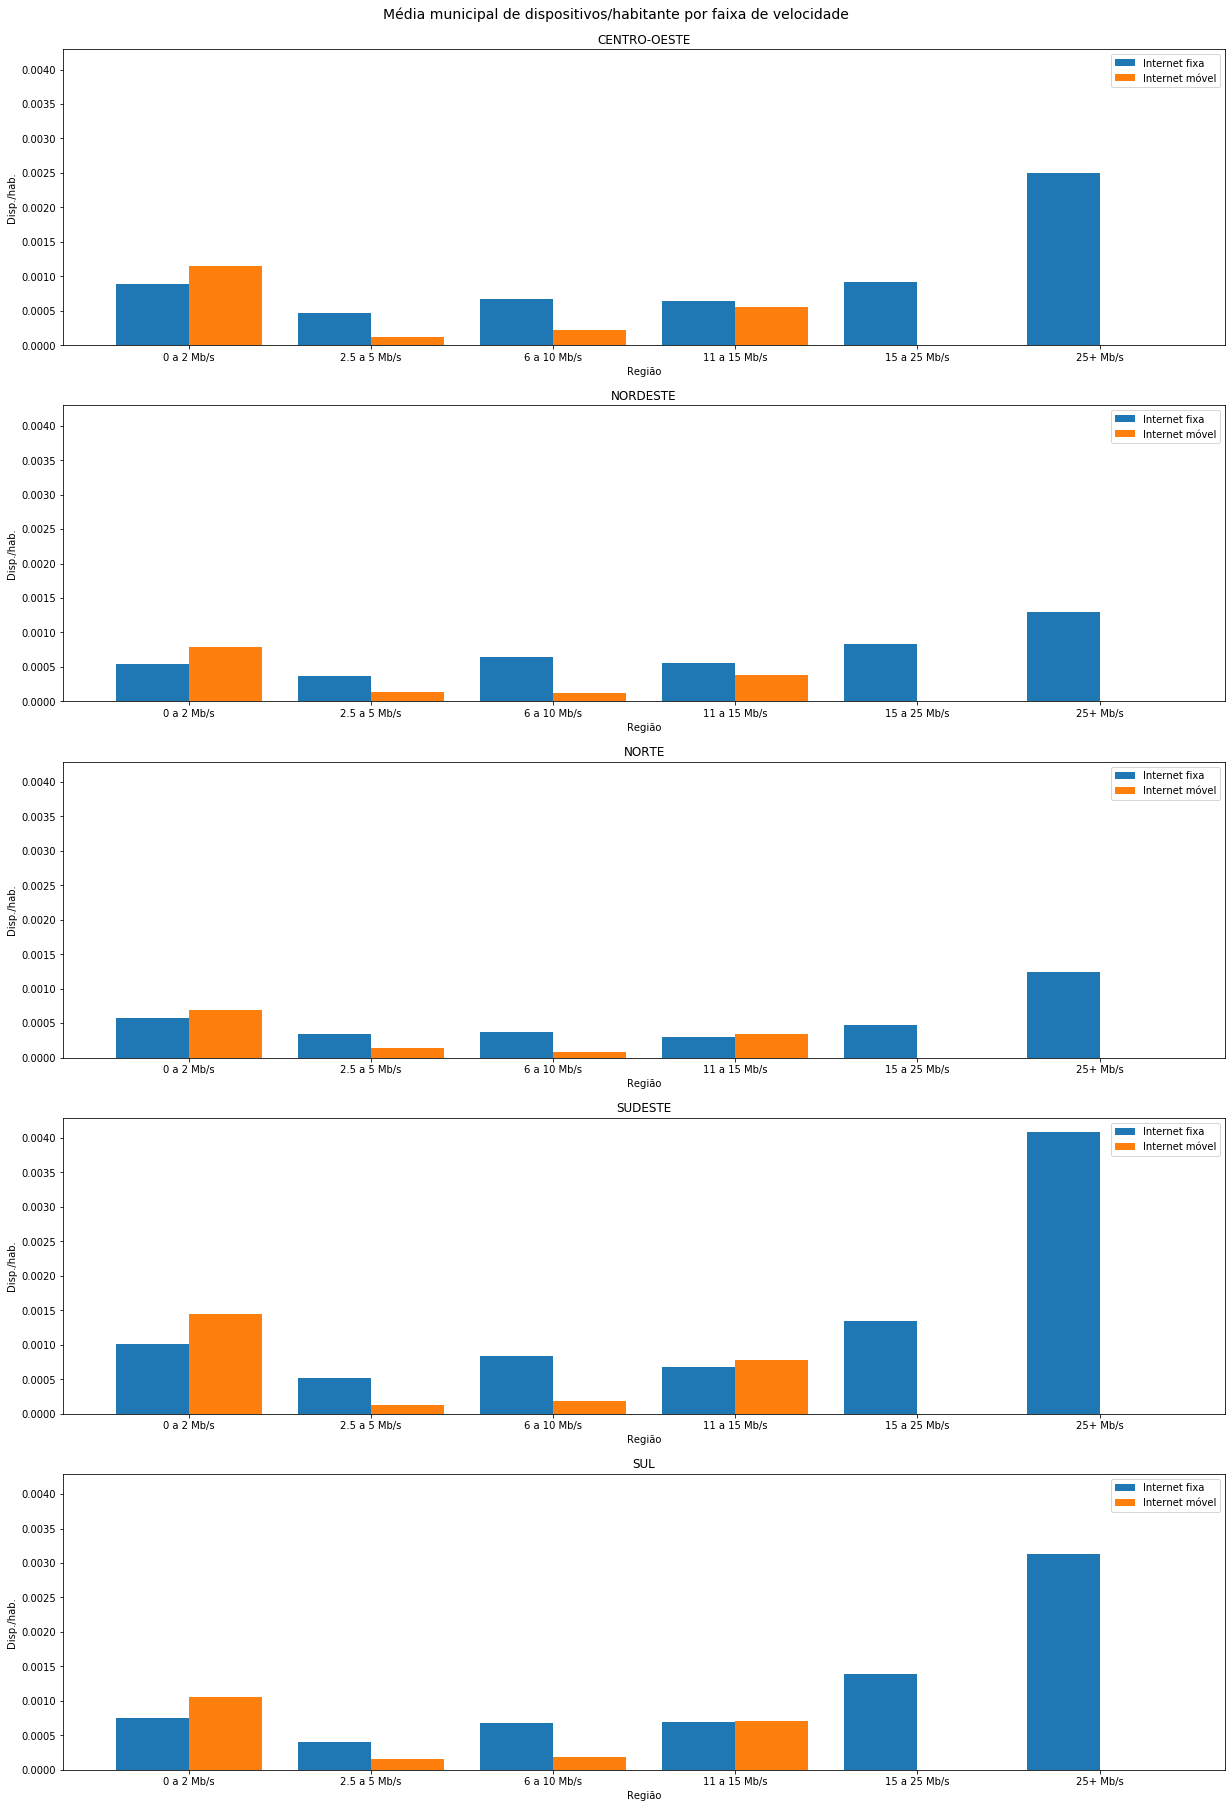

In [14]:
exploratory_analysis.get_internet_plot(dataset, 'device_distribution')

#### Distribuição da média de operadoras, por região

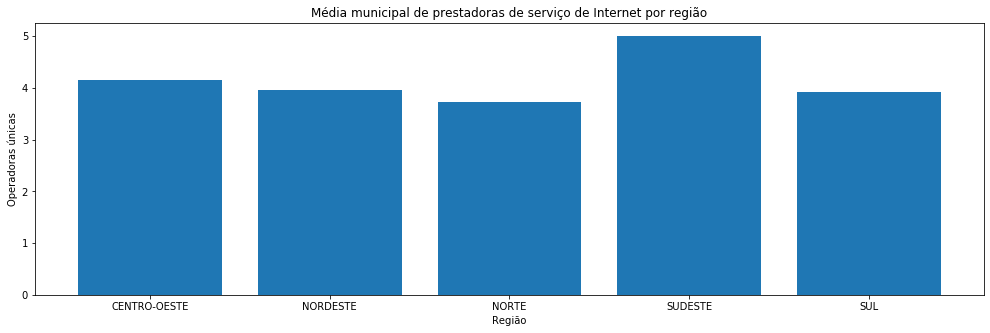

In [15]:
exploratory_analysis.get_internet_plot(dataset, 'isp_distribution')

### 2. Dados de Educação

Clique [aqui](#Conclus%C3%B5es---Educa%C3%A7%C3%A3o) para retornar à leitura.

#### IDEB

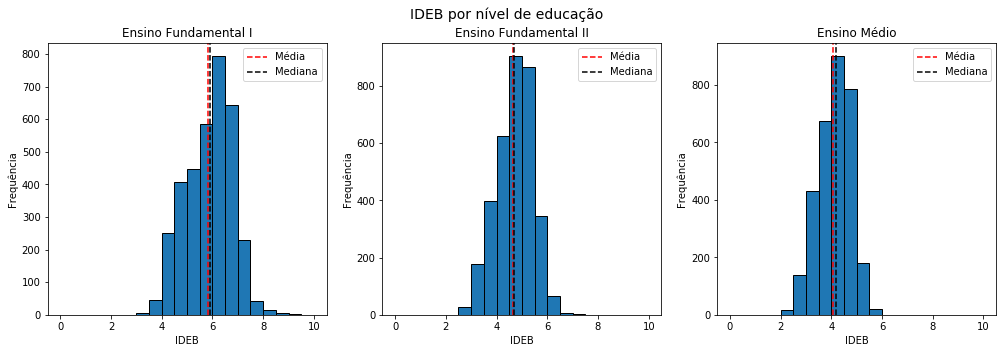

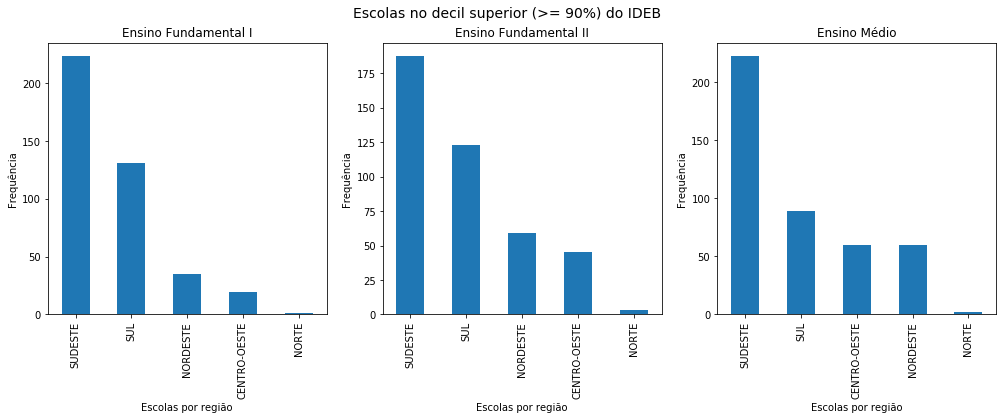

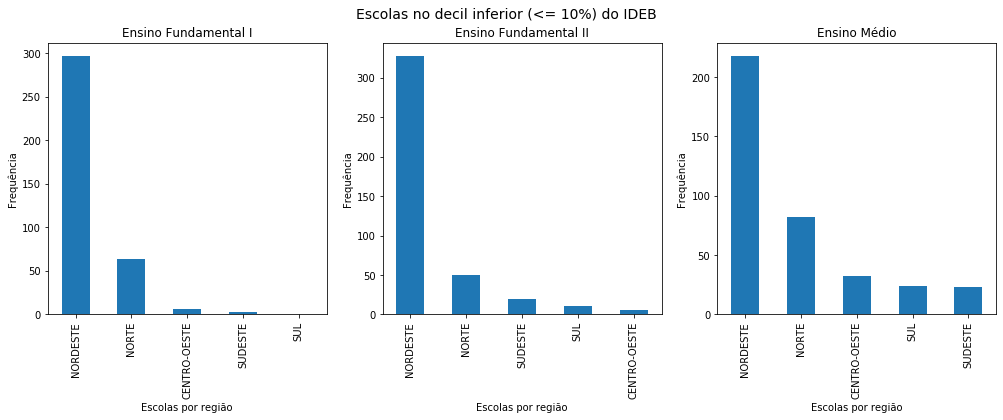

In [16]:
exploratory_analysis.get_education_plot(dataset, 'ideb')

#### Taxas de aprovação

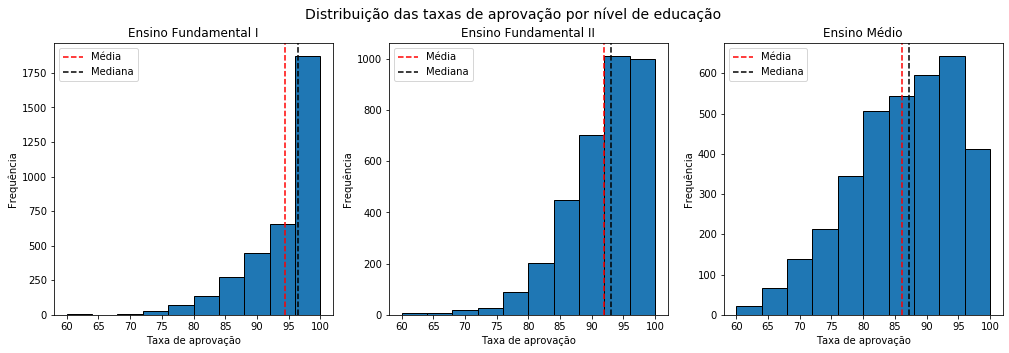

In [17]:
exploratory_analysis.get_education_plot(dataset, 'approval_rate')

#### SAEB - Matemática

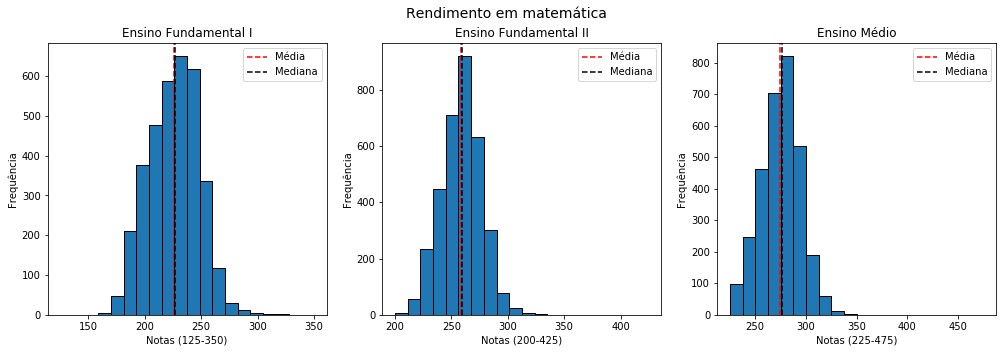

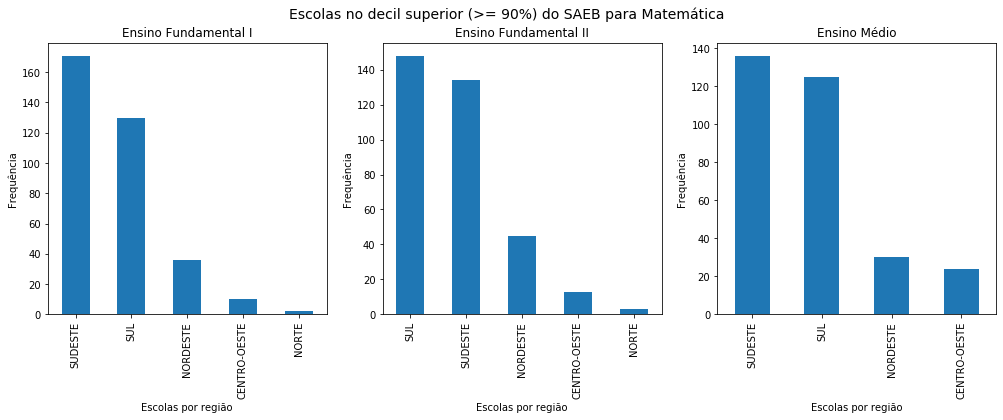

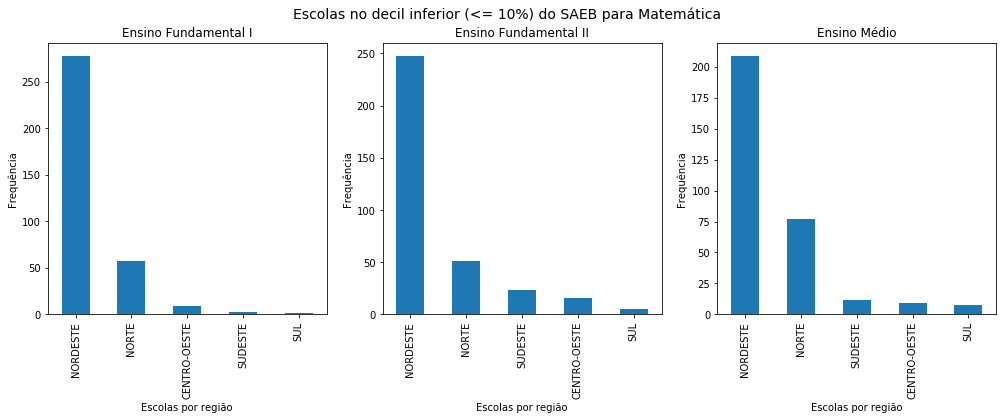

In [18]:
exploratory_analysis.get_education_plot(dataset, 'saeb_mat')

#### SAEB - Língua Portuguesa

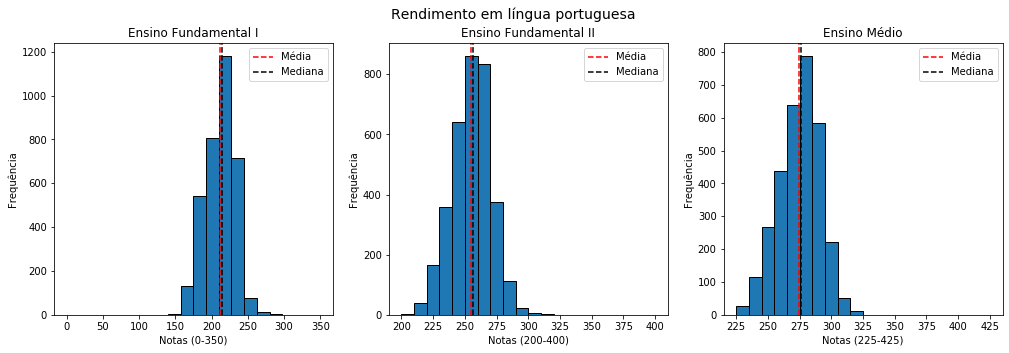

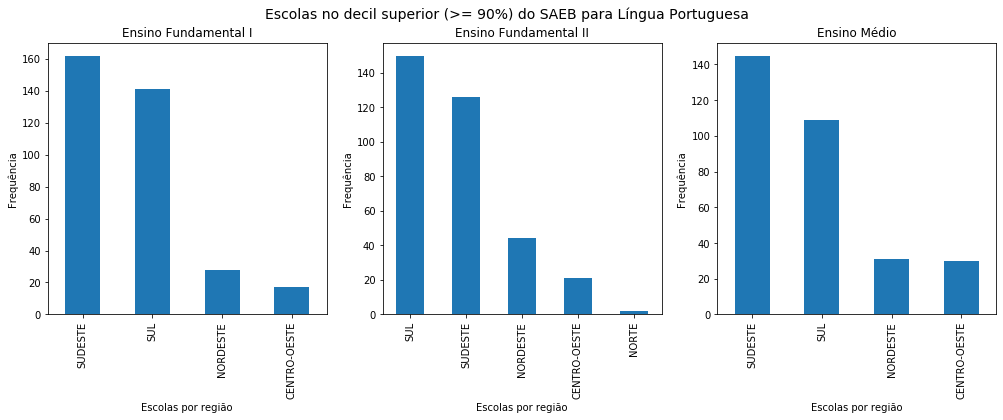

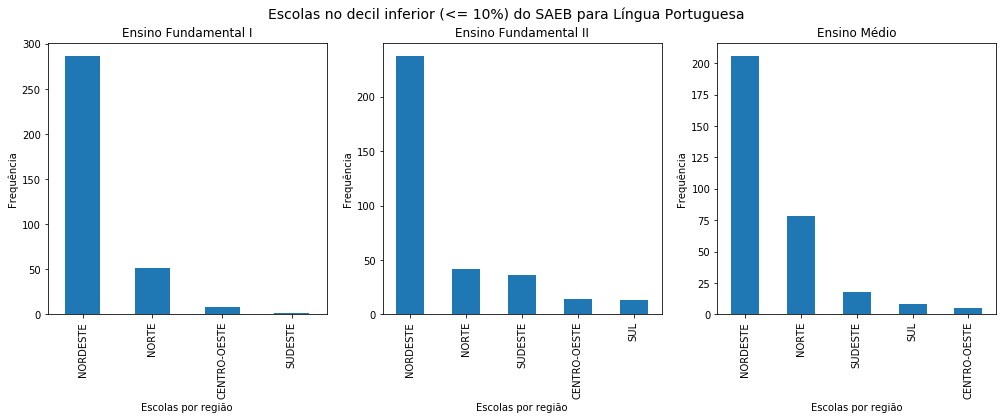

In [19]:
exploratory_analysis.get_education_plot(dataset, 'saeb_port')

### 3. Indicadores Sociais

Clique [aqui](#Conclus%C3%B5es---Indicadores-sociais) para retornar à leitura.

#### População por região

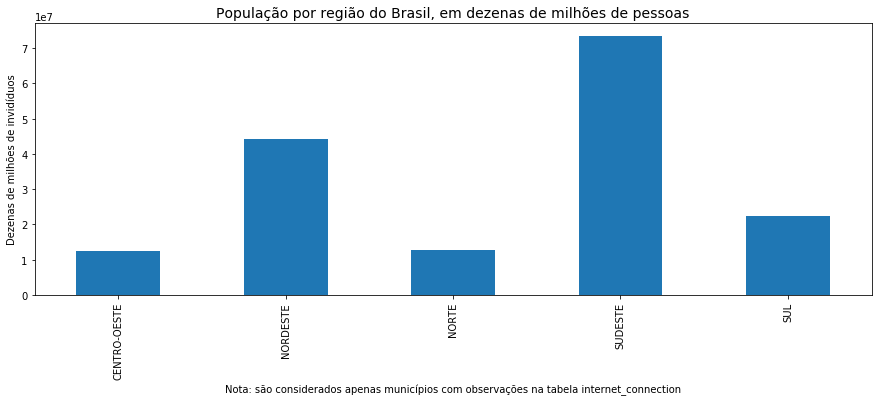

In [20]:
exploratory_analysis.get_social_plot(dataset, 'population')

#### Expectativa de vida

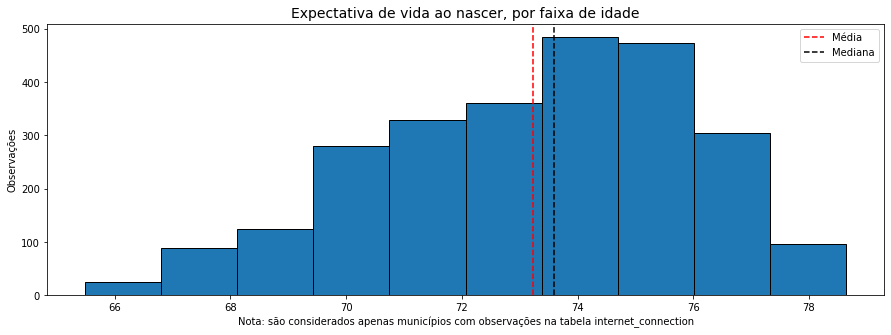

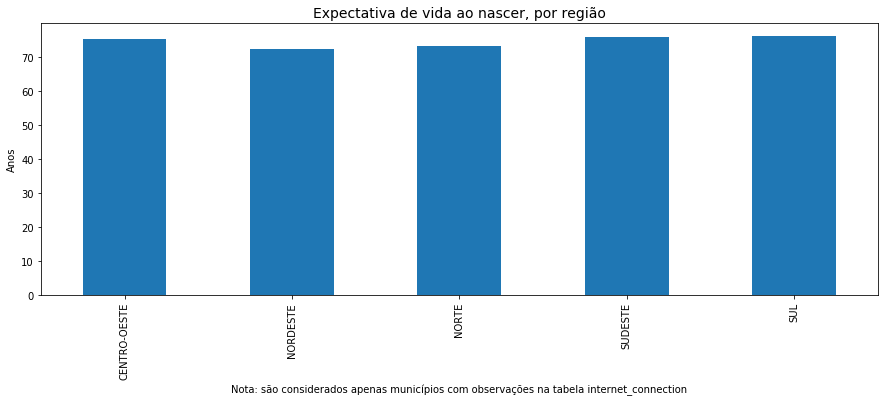

In [21]:
exploratory_analysis.get_social_plot(dataset, 'life_expectancy')

#### Analfabetismo

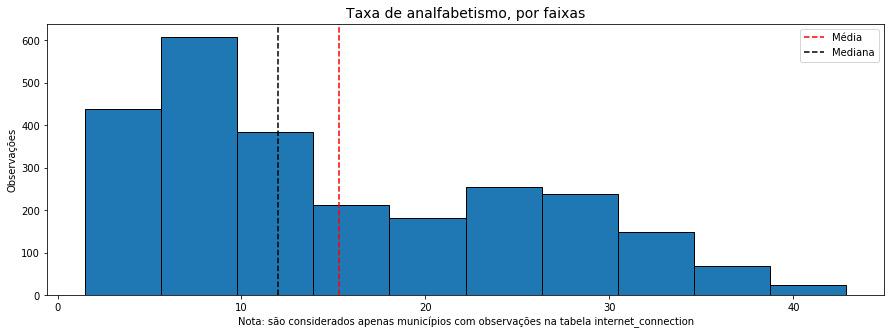

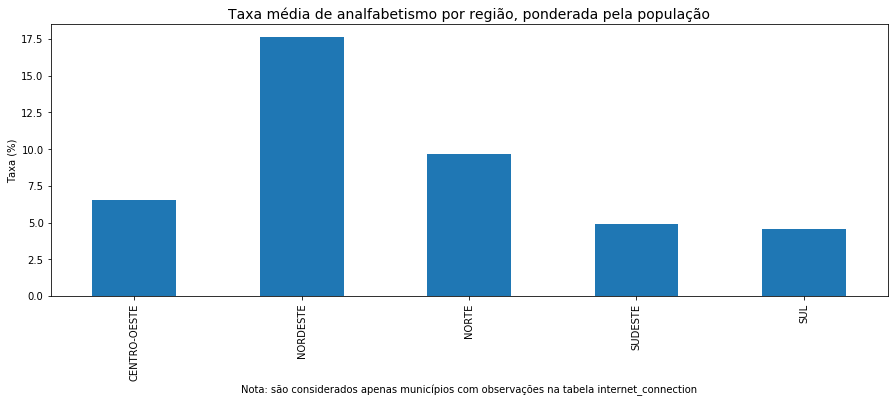

In [22]:
exploratory_analysis.get_social_plot(dataset, 'analfabetism')

#### Taxa de pobreza

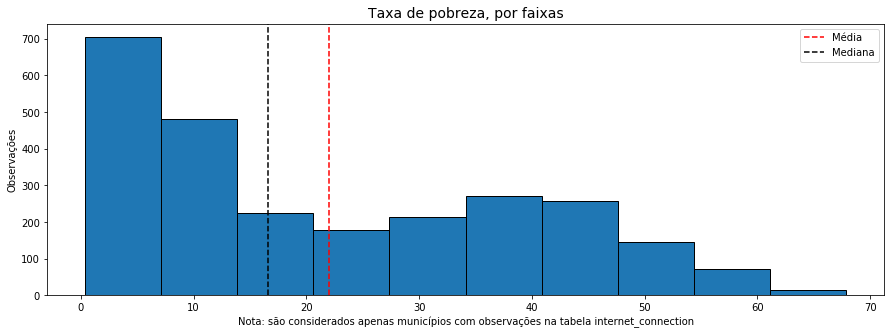

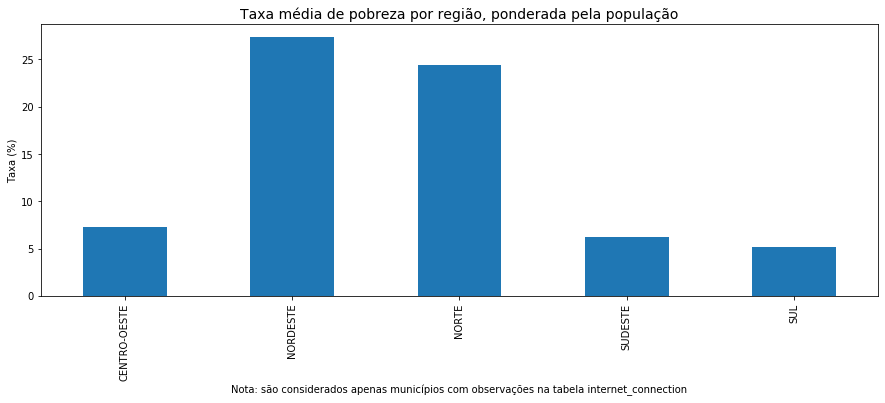

In [23]:
exploratory_analysis.get_social_plot(dataset, 'poverty')

#### PIB per capita

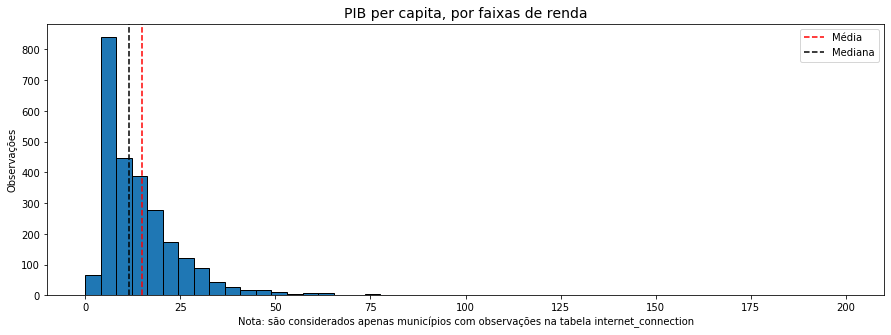

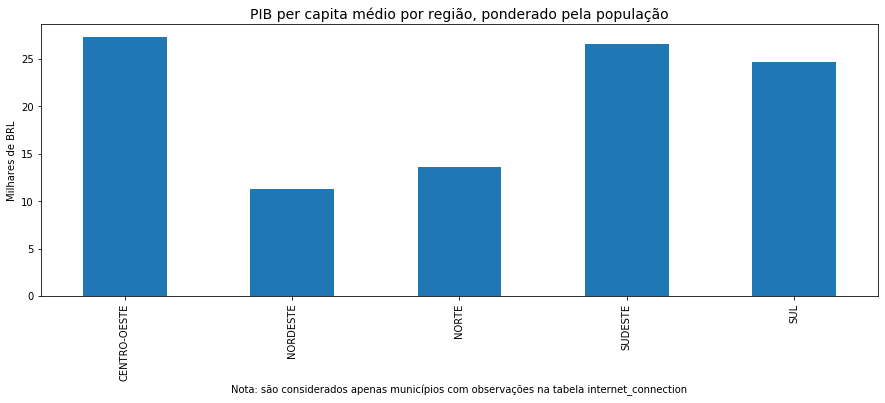

In [24]:
exploratory_analysis.get_social_plot(dataset, 'gdp_per_capita')

#### Mortalidade infantil

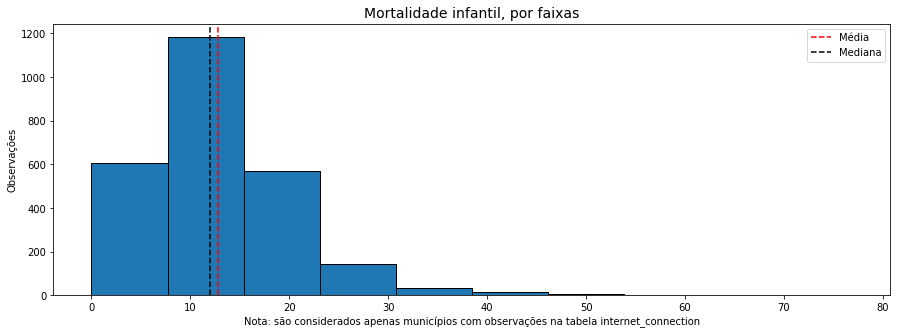

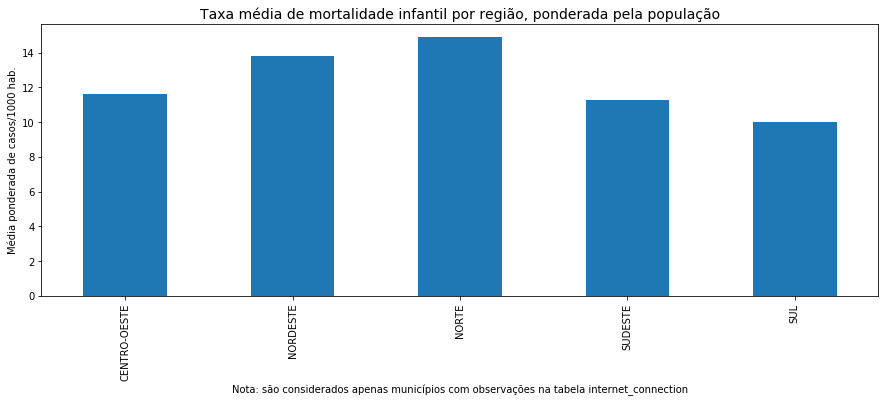

In [25]:
exploratory_analysis.get_social_plot(dataset, 'child_mortality')

#### Gravidez na adolescência

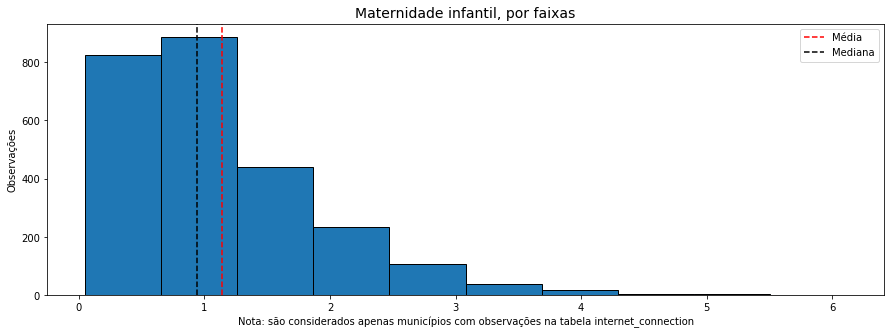

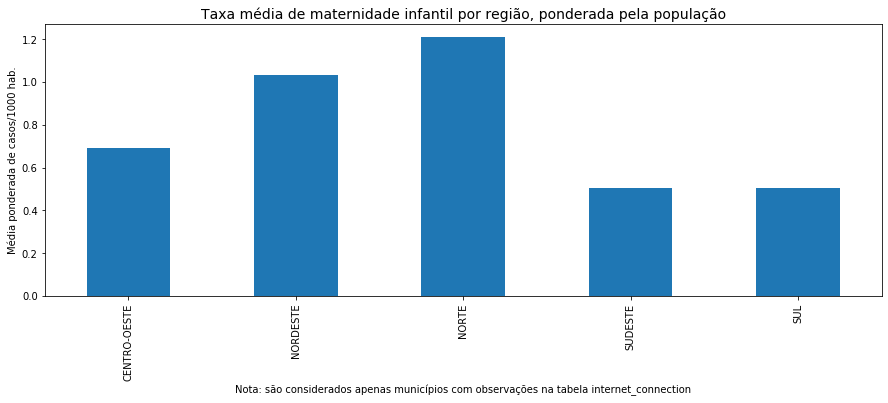

In [26]:
exploratory_analysis.get_social_plot(dataset, 'adolescent_pregnancy')

## C. Testes de Hipótese

### 1. Estatística do Teste A/B: diferenças entre taxas de aprovação por estado

Clique [aqui](#Diferen%C3%A7as-entre-taxas-de-aprova%C3%A7%C3%A3o-por-regi%C3%A3o) para voltar à leitura.

#### Ensino Fundamental I

In [27]:
hypothesis_tests.print_approval_rate_comparison(dataset, 'tx_aprov_ef_1')

Existe evidência de que a taxa de aprovação nos anos iniciais do ensino fundamental no Sudeste é maior do que no Centro-Oeste.
Intervalos de confiança:
 Centro-Oeste		 [96.34818904397757, 96.98435812583394] 
 Sudeste		 [97.25856433579618, 97.59221466016437] 

Existe evidência de que a taxa de aprovação nos anos iniciais do ensino fundamental no Sudeste é maior do que no Nordeste.
Intervalos de confiança:
 Nordeste		 [90.10349360177604, 90.81179535213771] 
 Sudeste		 [97.25856433579618, 97.59221466016437] 

Existe evidência de que a taxa de aprovação nos anos iniciais do ensino fundamental no Sudeste é maior do que no Norte.
Intervalos de confiança:
 Norte		 [88.91512015834472, 90.62064626501292] 
 Sudeste		 [97.25856433579618, 97.59221466016437] 

Existe evidência de que a taxa de aprovação nos anos iniciais do ensino fundamental no Sudeste é maior do que no Sul.
Intervalos de confiança:
 Sul		 [95.21868220230202, 95.72711053463361] 
 Sudeste		 [97.25856433579618, 97.59221466016437] 



#### Ensino Fundamental II

In [28]:
hypothesis_tests.print_approval_rate_comparison(dataset, 'tx_aprov_ef_2')

Não existe evidência de que a taxa de aprovação nos anos finais do ensino fundamental no Sudeste é maior do que no Centro-Oeste.
Intervalos de confiança:
 Centro-Oeste		 [92.37292559028768, 93.48716830642607] 
 Sudeste		 [92.37974924299355, 92.89997425930984] 

Existe evidência de que a taxa de aprovação nos anos finais do ensino fundamental no Sudeste é maior do que no Nordeste.
Intervalos de confiança:
 Nordeste		 [90.73241279371781, 91.45294591784919] 
 Sudeste		 [92.37974924299355, 92.89997425930984] 

Existe evidência de que a taxa de aprovação nos anos finais do ensino fundamental no Sudeste é maior do que no Norte.
Intervalos de confiança:
 Norte		 [89.1339487617496, 90.49059997471238] 
 Sudeste		 [92.37974924299355, 92.89997425930984] 

Existe evidência de que a taxa de aprovação nos anos finais do ensino fundamental no Sudeste é maior do que no Sul.
Intervalos de confiança:
 Sul		 [91.58414348282209, 92.1725466580232] 
 Sudeste		 [92.37974924299355, 92.89997425930984] 



#### Ensino Médio

In [29]:
hypothesis_tests.print_approval_rate_comparison(dataset, 'tx_aprov_em')

Existe evidência de que a taxa de aprovação no ensino médio no Sudeste é maior do que no Centro-Oeste.
Intervalos de confiança:
 Centro-Oeste		 [83.47058613060253, 85.58309557961132] 
 Sudeste		 [88.38377258303939, 89.09042096534785] 

Existe evidência de que a taxa de aprovação no ensino médio no Sudeste é maior do que no Nordeste.
Intervalos de confiança:
 Nordeste		 [84.37589254261596, 85.34355190182839] 
 Sudeste		 [88.38377258303939, 89.09042096534785] 

Existe evidência de que a taxa de aprovação no ensino médio no Sudeste é maior do que no Norte.
Intervalos de confiança:
 Norte		 [81.25064751829753, 83.04682540589017] 
 Sudeste		 [88.38377258303939, 89.09042096534785] 

Existe evidência de que a taxa de aprovação no ensino médio no Sudeste é maior do que no Sul.
Intervalos de confiança:
 Sul		 [83.8299580596733, 84.72316969363051] 
 Sudeste		 [88.38377258303939, 89.09042096534785] 



### 2. Estatística do Teste A/B: diferenças entre taxas de aprovação entre municípios pobres e ricos

Clique [aqui](#Diferen%C3%A7as-entre-taxas-de-aprova%C3%A7%C3%A3o-de-munic%C3%ADpios-pobres-e-ricos) para voltar à leitura.

#### Visão geral

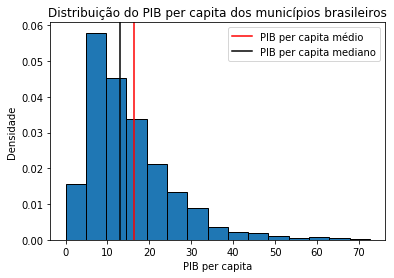

In [30]:
hypothesis_tests.get_histogram(dataset, 'dist_per_capita_gdp')

#### Ensino Fundamental I

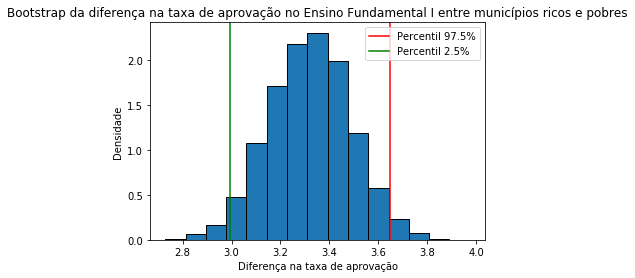

In [31]:
hypothesis_tests.get_histogram(dataset, 'bootstrap_ef_1_gdp')

#### Ensino Fundamental II

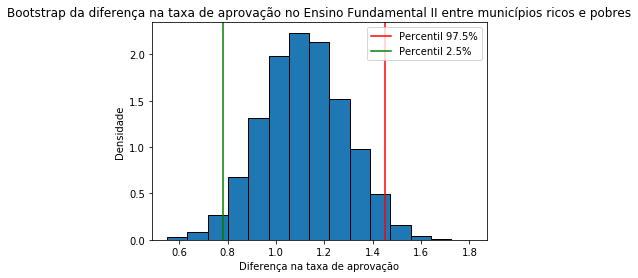

In [32]:
hypothesis_tests.get_histogram(dataset, 'bootstrap_ef_2_gdp')

#### Ensino Médio

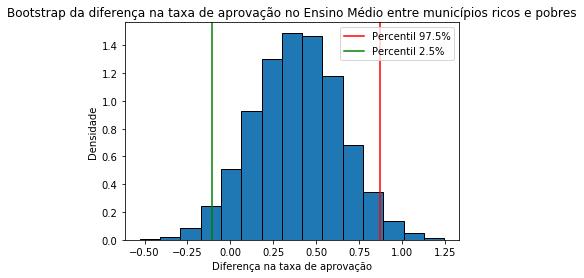

In [33]:
hypothesis_tests.get_histogram(dataset, 'bootstrap_em_gdp')

### 3. Estatística do Teste A/B: diferenças entre taxas de aprovação entre municípios com maior e menor acesso à Internet de alta velocidade

Clique [aqui](#Diferen%C3%A7as-entre-taxas-de-aprova%C3%A7%C3%A3o-entre-munic%C3%ADpios-com-menor-e-maior-acesso-%C3%A0-Internet-de-alta-velocidade) para voltar à leitura.

#### Visão geral

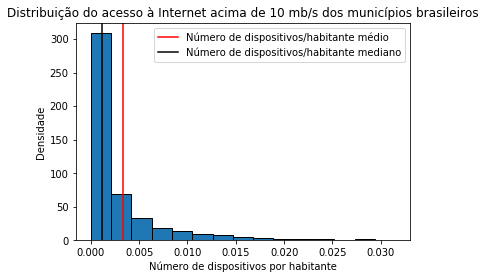

In [34]:
hypothesis_tests.get_histogram(dataset, 'dist_internet_connection')

#### Ensino Fundamental I

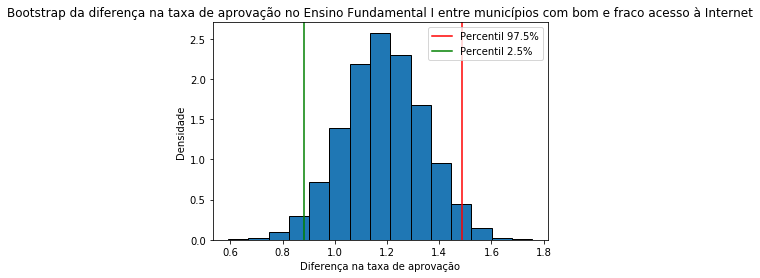

In [35]:
hypothesis_tests.get_histogram(dataset, 'bootstrap_ef_1_internet_connection')

#### Ensino Fundamental II

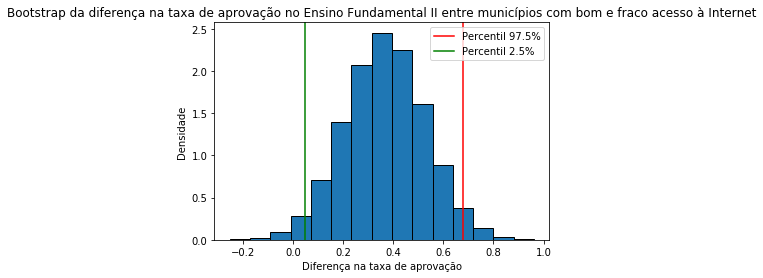

In [37]:
hypothesis_tests.get_histogram(dataset, 'bootstrap_ef_2_internet_connection')

#### Ensino Médio

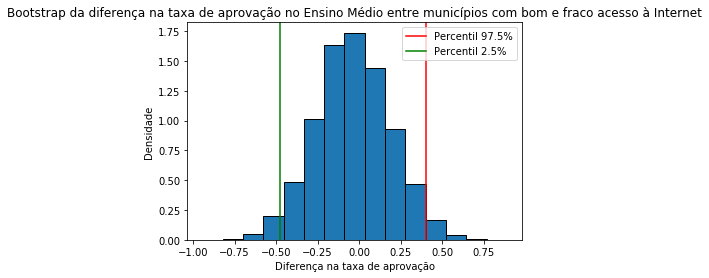

In [38]:
hypothesis_tests.get_histogram(dataset, 'bootstrap_em_internet_connection')

## D. Regressões

### 1. Regressões univariadas - gráficos

Clique [aqui](#Regress%C3%B5es-univariadas) para voltar à leitura.

#### I. Dispositivos/hab na faixa 0 a 2 Mb/s e taxa de aprovação no Ensino Fundamental I

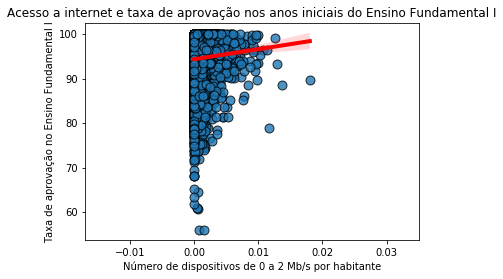

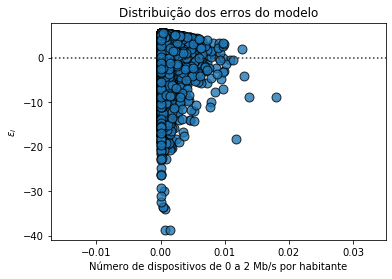

(None, None)

In [39]:
linear_regression.get_univariate_regression_plot(dataset, 'ef_1_reg'), linear_regression.get_univariate_regression_plot(dataset, 'ef_1')

#### II. Dispositivos/hab na faixa 0 a 2 Mb/s e taxa de aprovação no Ensino Fundamental II

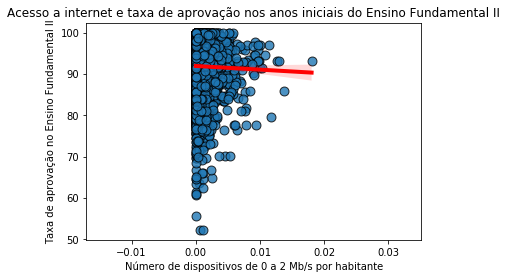

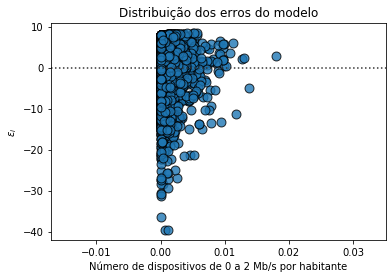

(None, None)

In [40]:
linear_regression.get_univariate_regression_plot(dataset, 'ef_2_reg'), linear_regression.get_univariate_regression_plot(dataset, 'ef_2')

#### III. Dispositivos/hab na faixa 0 a 2 Mb/s e taxa de aprovação no Ensino Médio

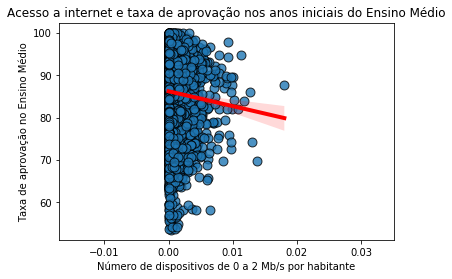

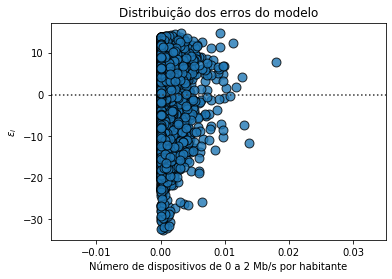

(None, None)

In [41]:
linear_regression.get_univariate_regression_plot(dataset, 'em_reg'), linear_regression.get_univariate_regression_plot(dataset, 'em')

### 2. Regressões multivariadas - _summaries_ de regressão

#### I. Modelo _main_

Clique [aqui](#Modelo-main) para voltar à leitura.

##### a) Ensino Fundamental I

In [42]:
linear_regression.get_multivariate_regression(dataset_train, 'main', 'ef_1')

                            OLS Regression Results                            
Dep. Variable:          tx_aprov_ef_1   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     106.0
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          1.23e-219
Time:                        22:18:37   Log-Likelihood:                -9057.6
No. Observations:                3002   AIC:                         1.814e+04
Df Residuals:                    2989   BIC:                         1.822e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercepto         76.3843      4.603     

##### b) Ensino Fundamental II

In [43]:
linear_regression.get_multivariate_regression(dataset_train, 'main', 'ef_2')

                            OLS Regression Results                            
Dep. Variable:          tx_aprov_ef_2   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     10.16
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           7.09e-20
Time:                        22:18:37   Log-Likelihood:                -9514.8
No. Observations:                3004   AIC:                         1.906e+04
Df Residuals:                    2991   BIC:                         1.913e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercepto         75.4687      5.348     

##### c) Ensino Médio

In [44]:
linear_regression.get_multivariate_regression(dataset_train, 'main', 'em')

                            OLS Regression Results                            
Dep. Variable:            tx_aprov_em   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     29.59
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           1.21e-64
Time:                        22:18:37   Log-Likelihood:                -10591.
No. Observations:                3005   AIC:                         2.121e+04
Df Residuals:                    2992   BIC:                         2.129e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercepto         82.3532      7.639     

#### II. Modelo de todas as faixas

Clique [aqui](#Modelo-de-todas-as-faixas) para voltar à leitura.

##### a) Ensino Fundamental I

In [45]:
linear_regression.get_multivariate_regression(dataset_train, 'all_speed_ranges', 'ef_1')

                            OLS Regression Results                            
Dep. Variable:          tx_aprov_ef_1   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     75.09
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          9.83e-216
Time:                        22:18:37   Log-Likelihood:                -9055.1
No. Observations:                3002   AIC:                         1.815e+04
Df Residuals:                    2984   BIC:                         1.825e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercepto         76.2860      4.605     

##### b) Ensino Fundamental II

In [46]:
linear_regression.get_multivariate_regression(dataset_train, 'all_speed_ranges', 'ef_2')

                            OLS Regression Results                            
Dep. Variable:          tx_aprov_ef_2   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     7.316
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           6.00e-18
Time:                        22:18:37   Log-Likelihood:                -9513.5
No. Observations:                3004   AIC:                         1.906e+04
Df Residuals:                    2986   BIC:                         1.917e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercepto         75.4991      5.353     

##### c) Ensino Médio

In [47]:
linear_regression.get_multivariate_regression(dataset_train, 'all_speed_ranges', 'em')

                            OLS Regression Results                            
Dep. Variable:            tx_aprov_em   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     21.28
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           1.91e-62
Time:                        22:18:38   Log-Likelihood:                -10587.
No. Observations:                3005   AIC:                         2.121e+04
Df Residuals:                    2987   BIC:                         2.132e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercepto         82.3624      7.640     

#### III. Modelo de duas faixas

Clique [aqui](#Modelo-de-duas-faixas) para voltar à leitura.

##### a) Ensino Fundamental I

In [48]:
linear_regression.get_multivariate_regression(dataset_train, 'dual_speed_ranges', 'ef_1')

                            OLS Regression Results                            
Dep. Variable:          tx_aprov_ef_1   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     97.93
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          6.88e-219
Time:                        22:18:38   Log-Likelihood:                -9056.9
No. Observations:                3002   AIC:                         1.814e+04
Df Residuals:                    2988   BIC:                         1.823e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercepto         76.2537      4.604     

##### b) Ensino Fundamental II

In [49]:
linear_regression.get_multivariate_regression(dataset_train, 'dual_speed_ranges', 'ef_2')

                            OLS Regression Results                            
Dep. Variable:          tx_aprov_ef_2   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     9.400
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           2.02e-19
Time:                        22:18:38   Log-Likelihood:                -9514.6
No. Observations:                3004   AIC:                         1.906e+04
Df Residuals:                    2990   BIC:                         1.914e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercepto         75.3793      5.350     

##### c) Ensino Médio

In [50]:
linear_regression.get_multivariate_regression(dataset_train, 'dual_speed_ranges', 'em')

                            OLS Regression Results                            
Dep. Variable:            tx_aprov_em   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     27.59
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           1.37e-64
Time:                        22:18:38   Log-Likelihood:                -10589.
No. Observations:                3005   AIC:                         2.121e+04
Df Residuals:                    2991   BIC:                         2.129e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercepto         82.1151      7.637     

#### IV. Modelo de interação

Clique [aqui](#Modelo-de-intera%C3%A7%C3%A3o) para voltar à leitura.

##### a) Ensino Fundamental I

In [51]:
linear_regression.get_multivariate_regression(dataset_train, 'interact', 'ef_1')

                            OLS Regression Results                            
Dep. Variable:          tx_aprov_ef_1   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     97.86
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          9.41e-219
Time:                        22:18:38   Log-Likelihood:                -9057.2
No. Observations:                3002   AIC:                         1.814e+04
Df Residuals:                    2988   BIC:                         1.823e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercepto          

##### b) Ensino Fundamental II

In [52]:
linear_regression.get_multivariate_regression(dataset_train, 'interact', 'ef_2')

                            OLS Regression Results                            
Dep. Variable:          tx_aprov_ef_2   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     9.548
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           8.69e-20
Time:                        22:18:38   Log-Likelihood:                -9513.7
No. Observations:                3004   AIC:                         1.906e+04
Df Residuals:                    2990   BIC:                         1.914e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercepto          

##### c) Ensino Médio

In [53]:
linear_regression.get_multivariate_regression(dataset_train, 'interact', 'em')

                            OLS Regression Results                            
Dep. Variable:            tx_aprov_em   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     27.30
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           6.71e-64
Time:                        22:18:38   Log-Likelihood:                -10591.
No. Observations:                3005   AIC:                         2.121e+04
Df Residuals:                    2991   BIC:                         2.129e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercepto          

#### V. Modelo não linear

Clique [aqui](#Modelo-n%C3%A3o-linear) para voltar à leitura.

##### a) Ensino Fundamental I

In [54]:
linear_regression.get_multivariate_regression(dataset_train, 'non_linear', 'ef_1')

                            OLS Regression Results                            
Dep. Variable:          tx_aprov_ef_1   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     97.84
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          1.02e-218
Time:                        22:18:39   Log-Likelihood:                -9057.3
No. Observations:                3002   AIC:                         1.814e+04
Df Residuals:                    2988   BIC:                         1.823e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercepto           76.3842      4.60

##### b) Ensino Fundamental II

In [55]:
linear_regression.get_multivariate_regression(dataset_train, 'non_linear', 'ef_2')

                            OLS Regression Results                            
Dep. Variable:          tx_aprov_ef_2   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     9.493
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           1.19e-19
Time:                        22:18:39   Log-Likelihood:                -9514.0
No. Observations:                3004   AIC:                         1.906e+04
Df Residuals:                    2990   BIC:                         1.914e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercepto           75.4670      5.34

##### c) Ensino Médio

In [56]:
linear_regression.get_multivariate_regression(dataset_train, 'non_linear', 'em')

                            OLS Regression Results                            
Dep. Variable:            tx_aprov_em   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     27.37
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           4.70e-64
Time:                        22:18:39   Log-Likelihood:                -10590.
No. Observations:                3005   AIC:                         2.121e+04
Df Residuals:                    2991   BIC:                         2.129e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercepto           82.3525      7.64